In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

In [14]:
train_test_dtypes = {
    'stock_id': np.uint8,
    'time_id': np.uint16,
    'target': np.float64
}

df_train = pd.read_csv('original data/train.csv', dtype=train_test_dtypes)

In [16]:
def root_mean_squared_percentage_error(y_true, y_pred, epsilon=1e-10):
    
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true + epsilon))))
    return rmspe


target_mean_rmspe = root_mean_squared_percentage_error(df_train['target'], np.repeat(df_train['target'].mean(), len(df_train)))
print(f'target Mean RMPSE: {target_mean_rmspe:.6}')

stock_id_target_mean_rmspe = root_mean_squared_percentage_error(df_train['target'], df_train.groupby('stock_id')['target'].transform('mean'))
print(f'stock_id target Mean RMPSE: {stock_id_target_mean_rmspe:.6}')

stock_id_target_median_rmspe = root_mean_squared_percentage_error(df_train['target'], df_train.groupby('stock_id')['target'].transform('median'))
print(f'stock_id target Median RMPSE: {stock_id_target_median_rmspe:.6}')

target Mean RMPSE: 1.11033
stock_id target Mean RMPSE: 0.789618
stock_id target Median RMPSE: 0.589135


In [18]:
def visualize_target(target):
    
    print(f'{target}\n{"-" * len(target)}')
        
    print(f'Mean: {df_train[target].mean():.4f}  -  Median: {df_train[target].median():.4f}  -  Std: {df_train[target].std():.4f}')
    print(f'Min: {df_train[target].min():.4f}  -  25%: {df_train[target].quantile(0.25):.4f}  -  50%: {df_train[target].quantile(0.5):.4f}  -  75%: {df_train[target].quantile(0.75):.4f}  -  Max: {df_train[target].max():.4f}')
    print(f'Skew: {df_train[target].skew():.4f}  -  Kurtosis: {df_train[target].kurtosis():.4f}')
    missing_values_count = df_train[df_train[target].isnull()].shape[0]
    training_samples_count = df_train.shape[0]
    print(f'Missing Values: {missing_values_count}/{training_samples_count} ({missing_values_count * 100 / training_samples_count:.4f}%)')

    fig, axes = plt.subplots(ncols=2, figsize=(24, 8), dpi=100)
    sns.kdeplot(df_train[target], label=target, fill=True, ax=axes[0])
    axes[0].axvline(df_train[target].mean(), label=f'{target} Mean', color='r', linewidth=2, linestyle='--')
    axes[0].axvline(df_train[target].median(), label=f'{target} Median', color='b', linewidth=2, linestyle='--')
    probplot(df_train[target], plot=axes[1])
    axes[0].legend(prop={'size': 16})
    
    for i in range(2):
        axes[i].tick_params(axis='x', labelsize=12.5, pad=10)
        axes[i].tick_params(axis='y', labelsize=12.5, pad=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    axes[0].set_title(f'{target} Distribution in Training Set', fontsize=20, pad=15)
    axes[1].set_title(f'{target} Probability Plot', fontsize=20, pad=15)

    plt.show()

target
------
Mean: 0.0039  -  Median: 0.0030  -  Std: 0.0029
Min: 0.0001  -  25%: 0.0020  -  50%: 0.0030  -  75%: 0.0047  -  Max: 0.0703
Skew: 2.8226  -  Kurtosis: 14.9611
Missing Values: 0/428932 (0.0000%)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


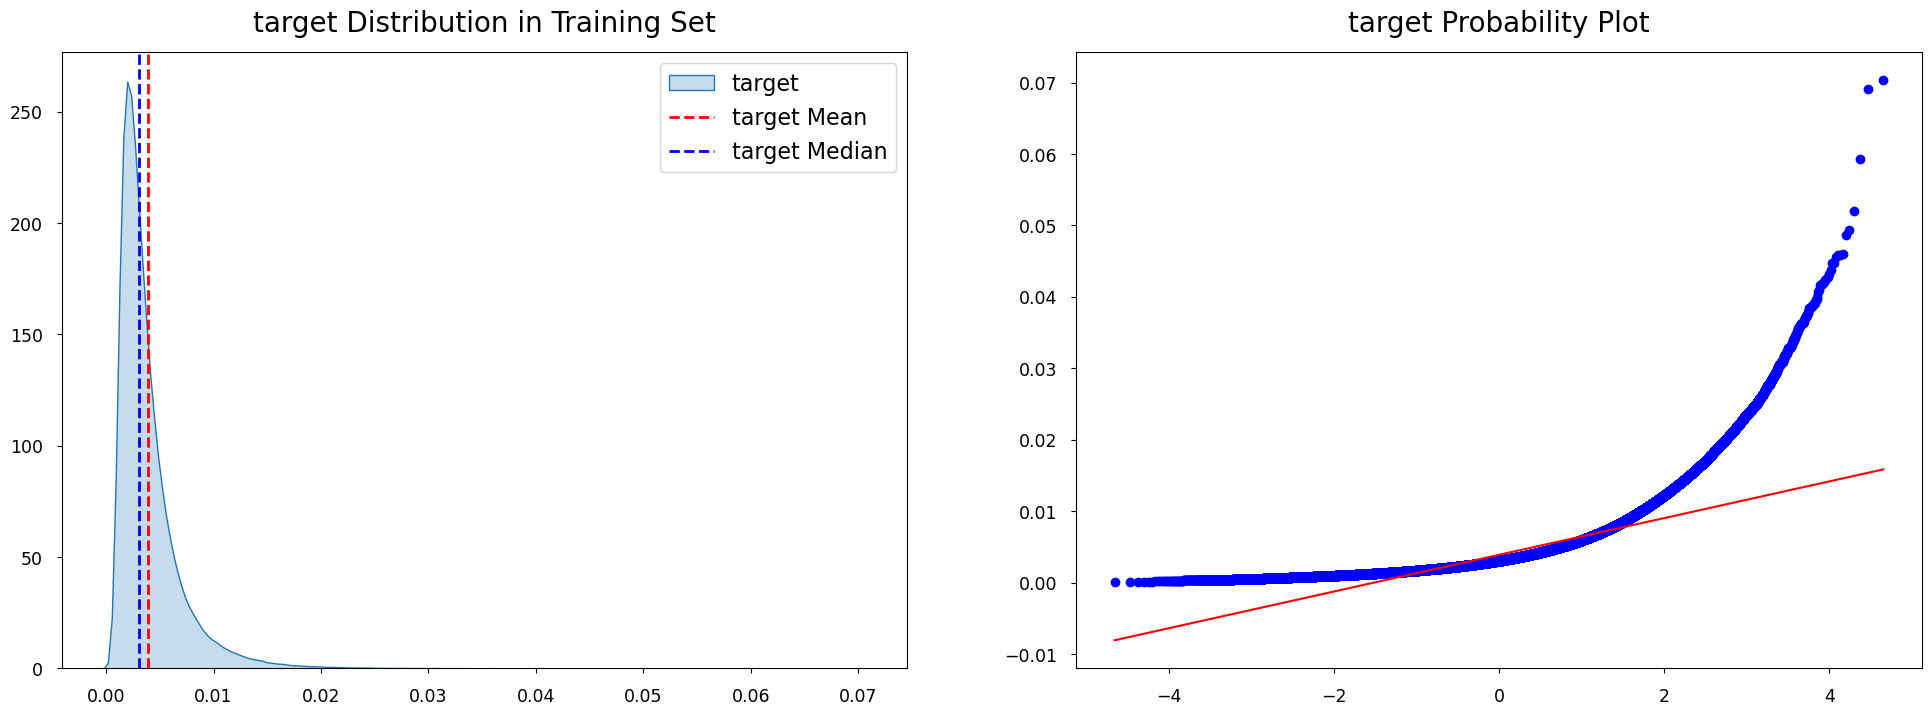

In [20]:
visualize_target('target')